In [120]:
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import scattertext as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing Tools
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import spacy

# Document-Term Matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Topic Modeling
from sklearn.decomposition import TruncatedSVD, NMF

# Topic Modeling
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

# Load Data

In [21]:
# Set the display constraints to be able to read entire reviews
pd.set_option('display.max_colwidth', None)

# open pickle file with sentiment and score
df = pd.read_pickle('df_sentiment_score_pkl')
df.sample(3)

,ID,Rating,Date,Reviewer_Location,Reviews,Branch,Rating_Type,Sentiment_Score
30952,549836408,5,2017-12,United Kingdom,Nobody does Christmas as well as Disney! Expensive it may be but when you see the look of wonder on the face of a 7 year old the cost doesn't come into it.,Paris,Positive,0.2124
27895,121681644,4,2011-12,United States,"I'm glad captain EO is back. Small world is great, love all the updated colors. Take a nap mid day... makes all the difference in the world.",California,Positive,0.9062
4212,371513574,5,2015-6,India,"Disney world is absolutely stunning. .....I am definitely speechless . All my life I have dreamed about going to DisneylandAnd a day at Disney was just a fairytale RC racer, Grizzly Gulch is recommended go first after the park gates opento avoid long waiting ........",HongKong,Positive,0.6361


# Visual of Words in Reviews

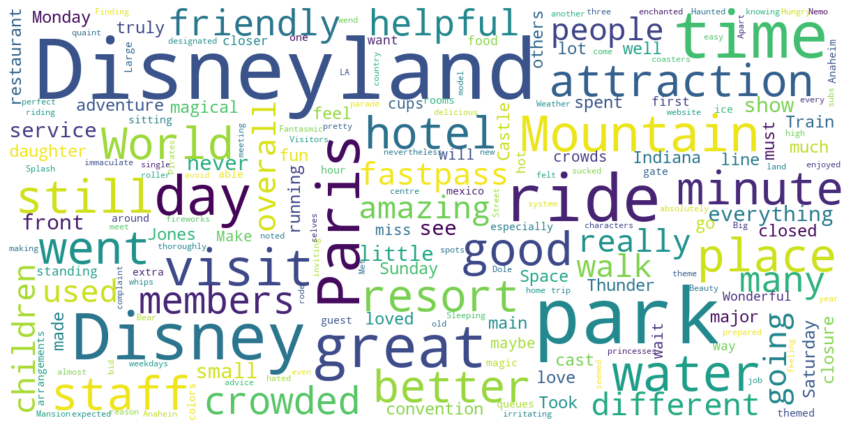

<Figure size 432x288 with 0 Axes>

In [86]:
# Visualization of the top 200 most important and frequent words in Reviews, 
# as indicated by size of text 
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=200, max_font_size=40, scale=3,
        random_state=1).generate(str(df['Reviews'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.savefig('disney_wordcloud.jpg')

# spaCy

In [122]:
# Load our chosen language model
nlp = spacy.load('en_core_web_sm')

In [129]:
print(nlp.Defaults.stop_words)

{'toward', '‘m', 'myself', 'anywhere', 'that', 'against', 'bottom', 'up', 'whereupon', "'m", 'is', 'us', 'becomes', 'even', '’ve', 'itself', 'sixty', 'own', 'but', 'without', 'did', 'anyhow', 'done', 'he', 'are', 'before', '‘re', 're', 'n’t', 'rather', 'being', "'re", 'a', 'afterwards', 'using', 'fifteen', 'amount', 'see', 'must', 'whereas', 'ours', 'so', 'ten', 'those', 'by', 'yourselves', 'always', 'behind', 'become', 'might', 'be', 'what', 'beside', 'there', 'ourselves', 'does', 'neither', 'how', 'hence', 'amongst', 'off', 'should', '‘d', '‘s', 'been', "'ll", 'nor', 'am', 'everything', 'something', 'twenty', 'none', 'if', 'all', 'another', 'show', 'my', 'yours', 'now', 'from', 'then', 'could', 'also', 'hundred', 'else', 'above', 'thereupon', 'few', 'moreover', 'otherwise', 'part', 'was', 'himself', 'side', 'about', 'anyway', 'every', 'six', 'they', 'do', 'give', 'latterly', "'s", 'two', 'out', 'onto', 'whom', 'most', 'mostly', 'unless', '‘ve', '‘ll', 'cannot', 'therefore', '’d', 'fu

In [6]:
# Create a column in the dataframe for the parsed spaCy document for the Reviews column
docs = list(nlp.pipe(df.Reviews))
df['spacy_doc'] = docs

In [7]:
df.head(3)

,ID,Rating,Date,Reviewer_Location,Reviews,Branch,Rating_Type,Sentiment_Score,spacy_doc
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,HongKong,Positive,0.7069,"(If, you, 've, ever, been, to, Disneyland, anywhere, you, 'll, find, Disneyland, Hong, Kong, very, similar, in, the, layout, when, you, walk, into, main, street, !, It, has, a, very, familiar, feel, ., One, of, the, rides, , its, a, Small, World, , is, absolutely, fabulous, and, worth, doing, ., The, day, we, visited, was, fairly, hot, and, relatively, busy, but, the, queues, moved, fairly, well, .)"
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",HongKong,Positive,0.9853,"(Its, been, a, while, since, d, last, time, we, visit, HK, Disneyland, .., Yet, ,, this, time, we, only, stay, in, Tomorrowland, .., AKA, Marvel, land!Now, they, have, Iron, Man, Experience, n, d, Newly, open, Ant, Man, n, d, Wasp!!Ironman, .., Great, feature, n, so, Exciting, ,, especially, d, whole, scenery, of, HK, (, HK, central, area, to, Kowloon)!Antman, .., Changed, by, previous, Buzz, lightyear, !, More, or, less, d, same, ,, but, I, 'm, expecting, to, have, something, most!!However, ,, my, boys, like, it!!Space, Mountain, .., Turns, into, Star, Wars, !, !, This, 1, is, Great!!!For, cast, members, (, ...)"
2,670623270,4,2019-4,United Arab Emirates,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was really expecting something grand even the main castle which was closed by the way was quite small).The food options are good, few coffee shops (including Starbucks) and plenty of gift shops. There was no issue with toilets as they are everywhere.All together it was a great day out and I really enjoyed it.",HongKong,Positive,0.9920,"(Thanks, God, it, wasn, , t, too, hot, or, too, humid, when, I, was, visiting, the, park, , otherwise, it, would, be, a, big, issue, (, there, is, not, a, lot, of, shade).I, have, arrived, around, 10:30am, and, left, at, 6, pm, ., Unfortunately, I, didn, , t, last, until, evening, parade, ,, but, 8.5, hours, was, too, much, for, me, ., There, is, plenty, to, do, and, everyone, will, find, something, interesting, for, themselves, to, enjoy, ., It, wasn, , t, extremely,

In [8]:
df[['spacy_doc', 'Rating_Type', 'Sentiment_Score']].sample(5)

,spacy_doc,Rating_Type,Sentiment_Score
18898,"(We, were, really, excited, to, go, to, Disneyland, this, year, ., The, prices, (, in, case, you, did, not, know, ), have, been, raised, again, to, almost, 100.00, a, ticket, ., Its, crazy, to, think, I, paid, much, less, for, the, park, just, a, few, years, ago, ., The, rides, are, pretty, outdated, and, some, of, the, best, ones, broke, down, while, we, were, at, the, park, (, Indiana, Jones, and, Space, Mountain, ), ., Overall, very, disappointed, .)",Negative,0.3612
7972,"(Everything, here, is, brand, new, and, perfect, ., Just, as, magical, as, all, other, Disneyland, we, 've, been, to, in, the, US, , absolutely, perfect, ., the, ', handlers, ', are, a, bit, strict, with, their, job, ,, making, a, few, kids, cry, because, time, was, up, !, but, that, s, the, only, thing, we, found, wrong, .)",Positive,-0.3910
38671,"(10, out, of, 10, for, John, and, his, team, ., They, were, waiting, for, us, at, the, airport, even, when, we, had, a, slight, delay, ., Chris, the, driver, was, from, South, Africa, so, no, stress, with, language, ., Even, had, a, baby, seat, which, we, requested, ., Collected, from, Disney, and, on, time, ,, the, whole, thing, was, stress, free, ., Really, good, value, ,, 70, euros, each, way, for, 4, adults, and, a, baby, ,, worked, out, cheaper, than, the, Disney, bus, and, at, a, time, to, suit, usWould, have, no, worries, in, recommending, them)",Positive,0.7788
17325,"(I, grew, up, in, California, and, we, were, fortunate, enough, to, have, season, passes, to, Disney, ., (, A, season, pass, was, maybe, $, 99, for, an, adult, ?, ), When, I, got, older, ,, I, actually, worked, at, the, park, for, a, little, while, ., The, park, has, a, certain, magic, about, it, ., But, that, magic, has, a, steep, price, tag, these, days, ., Look, for, coupons, , if, you, are, a, California, resident, ,, there, are, deals, periodically, ., If, not, ,, check, with, the, hotel, you, are, staying, at, ,, or, AAA, ., Some, people, do, ...)",Positive,0.9704
9201,"(We, truly, enjoyed, our, visit, to, Hong, Kong, Disneyland, ., Just, walking, towards, the, park, from, the, shuttle, parking, area, made, us, excited, to, be, a, step, closer, to, the, happiest, place, on, earth, !, Though, it, was, quite, a, walk, ,, we, were, so, glad, to, finally, see, the, park, gates, and, we, posed, for, souvenir, shots, along, the, way, ., There, was, no, queue, at, the, entrance, so, we, just, presented, our, tickets, and, we, were, off, ., After, the, awhile, ,, our, small, group, got, separated, inside, the, park, and, it, was, kinda, hard, to, find, each, ...)",Positive,0.9960


## Save to Pickle File

In [10]:
df.to_pickle('df_sentiment_score_spacy_doc_pkl')
df.to_csv('df_sentiment_score_spacy_doc.gz', compression='gzip', encoding='utf-8', index=False)

In [22]:
# Read in the pickle file
df = pd.read_pickle('df_sentiment_score_spacy_doc_pkl')

## POS by Sentiment

In [130]:
# Filter out the positive reviews
pos_reviews = df[df['Rating_Type']=='Positive']

# Extract only adjectives, exclude stop words
pos_adj = [token.text.lower() for doc in pos_reviews.spacy_doc for token in doc if (token.pos_=='ADJ' and not token.is_stop)]

# Find the 20 most common adjectives in the positive reviews
top_pos_adj = Counter(pos_adj).most_common(20)
top_pos_adj

[('great', 14402),
 ('good', 9898),
 ('fast', 6234),
 ('long', 5737),
 ('worth', 5644),
 ('amazing', 5535),
 ('old', 5300),
 ('best', 5272),
 ('little', 5116),
 ('expensive', 4645),
 ('magical', 4295),
 ('small', 4194),
 ('sure', 3651),
 ('busy', 3530),
 ('big', 3387),
 ('nice', 3299),
 ('better', 3079),
 ('clean', 2952),
 ('fun', 2896),
 ('able', 2840)]

In [131]:
# Do the same for the negative reviews
neg_reviews = df[df['Rating_Type']=='Negative']

neg_adj = [token.text.lower() for doc in neg_reviews.spacy_doc for token in doc if (token.pos_=='ADJ' and not token.is_stop)]

# Top 20 common adjectives in negative reviews
top_neg_adj = Counter(neg_adj).most_common(20)
top_neg_adj

[('good', 1050),
 ('long', 962),
 ('fast', 915),
 ('old', 780),
 ('expensive', 723),
 ('small', 693),
 ('great', 617),
 ('better', 611),
 ('little', 521),
 ('rude', 499),
 ('disappointed', 490),
 ('worth', 462),
 ('bad', 460),
 ('poor', 450),
 ('open', 407),
 ('big', 395),
 ('main', 353),
 ('nice', 326),
 ('crowded', 320),
 ('huge', 313)]

In [132]:
# Filter out the high sentiment score reviews
high_sent_reviews = df[df['Sentiment_Score']>0.9] # extreme high

# Extract the adjectives in the high sentiment reviews
high_sent_adj = [token.text.lower() for doc in high_sent_reviews.spacy_doc for token in doc if (token.pos_=='ADJ' and not token.is_stop)]

# Find the 20 most common adjectives in the high sentiment reviews
high_sent_adj = Counter(high_sent_adj).most_common(20)
high_sent_adj

[('great', 11545),
 ('good', 8184),
 ('fast', 4861),
 ('amazing', 4583),
 ('best', 4543),
 ('worth', 4436),
 ('long', 4262),
 ('old', 4126),
 ('little', 4048),
 ('expensive', 3422),
 ('small', 3277),
 ('magical', 3058),
 ('sure', 2963),
 ('nice', 2710),
 ('big', 2634),
 ('better', 2592),
 ('busy', 2581),
 ('clean', 2494),
 ('friendly', 2269),
 ('fun', 2263)]

In [133]:
# Filter out the low sentiment score reviews
low_sent_reviews = df[df['Sentiment_Score']<0] # extreme low

# Extract the adjectives in the high sentiment reviews
low_sent_adj = [token.text.lower() for doc in low_sent_reviews.spacy_doc for token in doc if (token.pos_=='ADJ' and not token.is_stop)]

# Find the 20 most common adjectives in the high sentiment reviews
low_sent_adj = Counter(low_sent_adj).most_common(20)
low_sent_adj

[('long', 607),
 ('fast', 580),
 ('good', 520),
 ('expensive', 495),
 ('old', 483),
 ('bad', 401),
 ('small', 397),
 ('rude', 387),
 ('disappointed', 383),
 ('little', 352),
 ('great', 347),
 ('poor', 313),
 ('worth', 281),
 ('magical', 260),
 ('big', 244),
 ('better', 241),
 ('open', 231),
 ('busy', 224),
 ('disappointing', 217),
 ('main', 217)]

**Not much difference between lists of top words from Rating Type (Positive/Negative) and Sentiment Score (extreme positive >0.9 and extreme negative < 0.**

In [19]:
# If error occurs with Matplotlib visualizing with no backend GUI, run the install
# pip install tk

Note: you may need to restart the kernel to use updated packages.


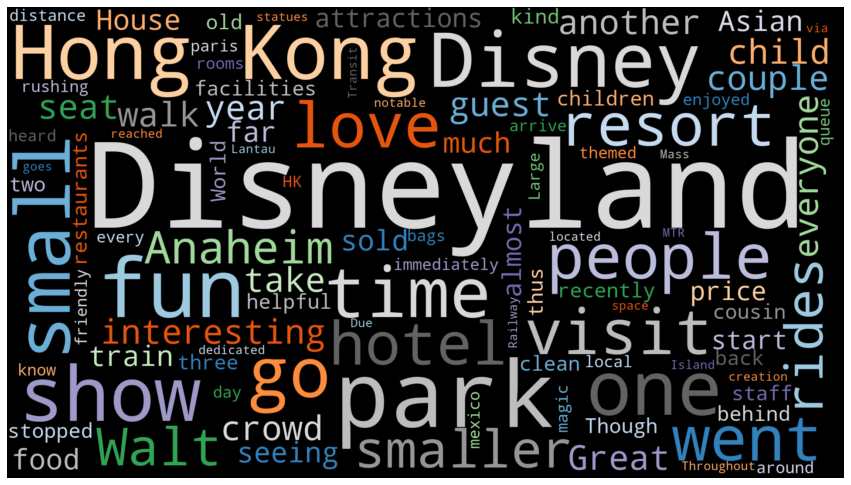

<Figure size 432x288 with 0 Axes>

In [32]:
# WordCloud of 100 top adjectives in Positive-Type reviews
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

pos_wordcloud = WordCloud(stopwords=stopwords, width=1920, height=1080, 
                      background_color="black", max_words=100, contour_width=3, 
                      colormap='tab20c', random_state=0).generate(str(pos_reviews['Reviews'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.savefig('pos_wordcloud.jpg')

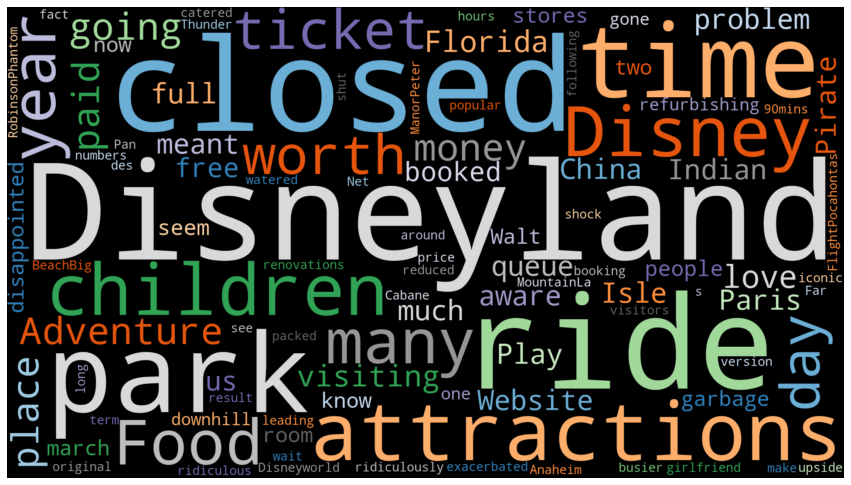

<Figure size 432x288 with 0 Axes>

In [31]:
# WordCloud of 100 top adjectives in Negative-Type reviews

neg_wordcloud = WordCloud(stopwords=stopwords, width=1920, height=1080, 
                      background_color="black", max_words=100, contour_width=3, 
                      colormap='tab20c', random_state=0).generate(str(neg_reviews['Reviews'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

plt.savefig('neg_wordcloud.jpg')

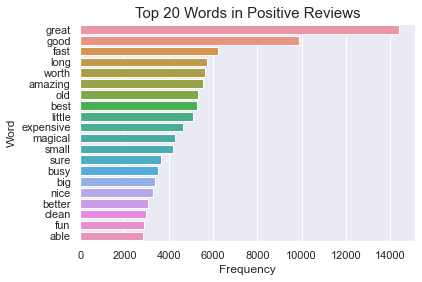

<Figure size 432x288 with 0 Axes>

In [134]:
# Visualize top words
x=list(dict(top_pos_adj).values())
y=list(dict(top_pos_adj).keys())

sns.barplot(x=x, y=y, data=pos_reviews) 

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 20 Words in Positive Reviews", fontsize=15)
plt.show()

#plt.savefig('top_20_pos_barplot.jpg')

Words, such as: **"Great", "Good", "Amazing", "Best", "Magical"** show up in the top 20 adjectives in the positive reviews

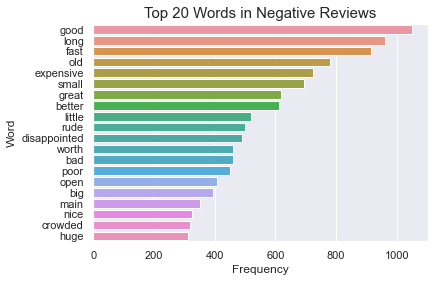

<Figure size 432x288 with 0 Axes>

In [137]:
# Visualize top words
sns.barplot(x=list(dict(top_neg_adj).values()), y=list(dict(top_neg_adj).keys()), data=neg_reviews)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top 20 Words in Negative Reviews", fontsize=15)
plt.show()

#plt.savefig('top_20_neg_barplot.jpg')

Words, such as: **"Good", "Expensive", "Old", "Long", and "Small"** show up in the top 20 adjectives in the negative reviews. This also tells us that we need more context, i.e. with the word "Good", to really understand the sentiment of the review.

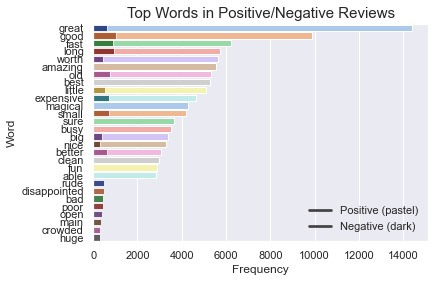

<Figure size 432x288 with 0 Axes>

In [138]:
# Overlap of top 20 words in both positive and negative reviews
A = dict(top_pos_adj)
B = dict(top_neg_adj)
df_AB = pd.concat([pd.Series(A, name='Positive'), pd.Series(B, name='Negative')], axis=1)

# Words in Positive Reviews (pastel colors)
sns.barplot(x=df_AB.Positive.values, y=df_AB.index, palette='pastel', alpha=1, label='Positive')
# Words in Negative Reviews (dark colors)
sns.barplot(x=df_AB.Negative.values, y=df_AB.index, palette='dark', alpha=0.8, label='Negative')#, bottom=df_AB.Negative.values)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top Words in Positive/Negative Reviews", fontsize=15)

plt.legend(labels=["Positive (pastel)", "Negative (dark)"], frameon=False, loc="lower right")
plt.show()

#plt.savefig('top_20_pos_neg_barplot.jpg')

When we compare the two lists for top adjectives in both positive and negative reviews, we get:

Positive reviews: **'magical', 'amazing', 'best', 'clean', 'fun'** 

Negative reviews: **'rude', 'disappointed', 'bad', 'crowded', 'huge'** 

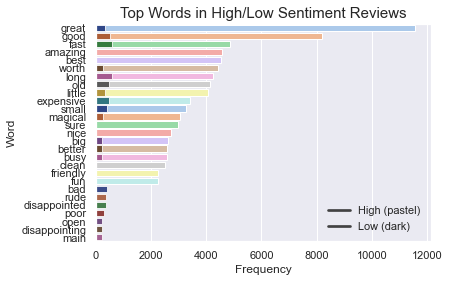

In [141]:
# Overlap of top 20 words in both high sentiment vs low sentiment
C = dict(high_sent_adj)
D = dict(low_sent_adj)
df_CD = pd.concat([pd.Series(C, name='high_sentiment'), pd.Series(D, name='low_sentiment')], axis=1)

# Words in High Sentiment Reviews (pastel colors)
sns.barplot(x=df_CD.high_sentiment.values, y=df_CD.index, palette='pastel', alpha=1, label='High')
# Words in Low Sentiment Reviews (dark colors)
sns.barplot(x=df_CD.low_sentiment.values, y=df_CD.index, palette='dark', alpha=0.8, label='Low')#, bottom=df_AB.Negative.values)

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.title("Top Words in High/Low Sentiment Reviews", fontsize=15)

plt.legend(labels=["High (pastel)", "Low (dark)"], frameon=False, loc="lower right")
plt.show()

#plt.savefig('top_20_high_low_barplot.jpg')

If we compare the word frequency from the reviews based on sentiment scores, and only looking at those that score in the extremes (above 0.9 (very happy) and below 0 (very unhappy)), we get:

High sentiment: **'amazing', 'best', 'nice', 'clean', 'friendly', 'fun'**

Low sentiment: **'bad', 'rude', 'disappointed', 'poor', 'disappointing'**

So the lists of word frequencies from both the Positive/Negative and High/Low Sentiment reviews are not too different from each other.

## Dependency Parsing

In [ ]:
low_sent_adj = [token.text.lower() for doc in low_sent_reviews.spacy_doc for token in doc if (token.pos_=='ADJ' and not token.is_stop)]


In [150]:
from spacy.symbols import amod
from pprint import pprint

In [13]:
# Function to extract adjective modifiers given noun of interest
def get_amods(noun, ser):
    amod_list = []
    for doc in ser:
        for token in doc:
            if (token.text) == noun:
                for child in token.children:
                    if child.dep == amod:
                        amod_list.append(child.text.lower())
    return sorted(amod_list)

# Function to print 20 most common adjective modifiers (along with their frequency) 
# given noun of interest, categorized by rating type
def amods_by_sentiment(noun):
    print(f"Adjectives describing {str.upper(noun)}:\n")
    
    print("POSITIVE:")
    pos_list = get_amods(noun, pos_reviews.spacy_doc)
    pprint(Counter(pos_list).most_common(20))
    
    print("\nNEGATIVE:")
    neg_list = get_amods(noun, neg_reviews.spacy_doc)
    pprint(Counter(neg_list).most_common(20))

In [14]:
# Find words around "food" by positive/negative rate type
amods_by_sentiment("food")

Adjectives describing FOOD:

POSITIVE:
[('own', 312),
 ('fast', 309),
 ('good', 176),
 ('great', 129),
 ('expensive', 87),
 ('outside', 43),
 ('best', 40),
 ('available', 39),
 ('decent', 31),
 ('vegetarian', 31),
 ('indian', 30),
 ('chinese', 29),
 ('better', 28),
 ('nice', 28),
 ('much', 22),
 ('healthy', 21),
 ('asian', 19),
 ('overpriced', 19),
 ('western', 19),
 ('delicious', 18)]

NEGATIVE:
[('fast', 78),
 ('own', 39),
 ('expensive', 36),
 ('overpriced', 19),
 ('poor', 17),
 ('good', 16),
 ('terrible', 16),
 ('bad', 14),
 ('priced', 12),
 ('awful', 11),
 ('decent', 8),
 ('horrible', 8),
 ('mediocre', 8),
 ('same', 8),
 ('better', 7),
 ('great', 7),
 ('hot', 7),
 ('much', 6),
 ('only', 6),
 ('available', 5)]


In [8]:
# Find sentiments around "park"
amods_by_sentiment("park")

Adjectives describing PARK:

POSITIVE:
[('whole', 310),
 ('other', 274),
 ('main', 217),
 ('great', 202),
 ('original', 191),
 ('entire', 166),
 ('small', 109),
 ('best', 105),
 ('smaller', 99),
 ('nice', 74),
 ('beautiful', 67),
 ('good', 59),
 ('first', 56),
 ('clean', 55),
 ('amazing', 50),
 ('big', 45),
 ('huge', 37),
 ('wonderful', 36),
 ('second', 34),
 ('only', 32)]

NEGATIVE:
[('other', 48),
 ('whole', 45),
 ('main', 37),
 ('entire', 21),
 ('small', 16),
 ('local', 14),
 ('original', 12),
 ('crowded', 10),
 ('first', 10),
 ('great', 9),
 ('worst', 8),
 ('smaller', 7),
 ('better', 6),
 ('full', 6),
 ('new', 6),
 ('second', 6),
 ('actual', 5),
 ('beautiful', 5),
 ('big', 4),
 ('expensive', 4)]


In [9]:
# Find sentiments around "experience"
amods_by_sentiment("experience")

Adjectives describing EXPERIENCE:

POSITIVE:
[('great', 498),
 ('magical', 313),
 ('amazing', 251),
 ('whole', 235),
 ('wonderful', 182),
 ('first', 152),
 ('good', 140),
 ('overall', 117),
 ('best', 94),
 ('different', 80),
 ('fantastic', 72),
 ('fun', 66),
 ('awesome', 57),
 ('nice', 55),
 ('enjoyable', 53),
 ('memorable', 51),
 ('new', 46),
 ('bad', 44),
 ('full', 42),
 ('same', 38)]

NEGATIVE:
[('whole', 52),
 ('magical', 47),
 ('bad', 37),
 ('worst', 28),
 ('better', 27),
 ('great', 26),
 ('disappointing', 22),
 ('good', 21),
 ('terrible', 21),
 ('poor', 20),
 ('first', 19),
 ('same', 14),
 ('overall', 11),
 ('horrible', 9),
 ('awful', 8),
 ('different', 8),
 ('miserable', 8),
 ('pleasant', 8),
 ('similar', 8),
 ('enjoyable', 7)]


In [10]:
# Find sentiments around "price"
amods_by_sentiment("price")

Adjectives describing PRICE:

POSITIVE:
[('same', 72),
 ('reasonable', 42),
 ('full', 34),
 ('high', 27),
 ('good', 16),
 ('great', 12),
 ('discounted', 11),
 ('cheaper', 10),
 ('half', 9),
 ('average', 8),
 ('best', 8),
 ('higher', 8),
 ('normal', 8),
 ('small', 8),
 ('better', 7),
 ('reduced', 7),
 ('regular', 7),
 ('decent', 6),
 ('expensive', 6),
 ('lower', 6)]

NEGATIVE:
[('full', 60),
 ('same', 20),
 ('high', 6),
 ('extortionate', 3),
 ('low', 3),
 ('premium', 3),
 ('ridiculous', 3),
 ('average', 2),
 ('good', 2),
 ('hefty', 2),
 ('normal', 2),
 ('reasonable', 2),
 ('stupid', 2),
 ('usual', 2),
 ('affordable', 1),
 ('astronomic', 1),
 ('big', 1),
 ('cheaper', 1),
 ('cheapest', 1),
 ('correct', 1)]


# Preprocessing

In [13]:
# Remove stop words (but retain "not" to handle negative sentiment) and punctuation; extract only the lemmatized, lowercase text from spacy_doc
docs_clean = [[w.lemma_.lower() for w in doc if (not w.is_stop and not w.is_punct and not w.like_num) \
             or (w.lemma =='not')] for doc in docs]

# Create a column with the cleaned docs
df['docs_clean'] = docs_clean

In [14]:
df[['Reviews', 'spacy_doc', 'docs_clean', 'Rating_Type', 'Sentiment_Score']].head(3)

,Reviews,spacy_doc,docs_clean,Rating_Type,Sentiment_Score
0,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well.,"(If, you, 've, ever, been, to, Disneyland, anywhere, you, 'll, find, Disneyland, Hong, Kong, very, similar, in, the, layout, when, you, walk, into, main, street, !, It, has, a, very, familiar, feel, ., One, of, the, rides, , its, a, Small, World, , is, absolutely, fabulous, and, worth, doing, ., The, day, we, visited, was, fairly, hot, and, relatively, busy, but, the, queues, moved, fairly, well, .)","[disneyland, find, disneyland, hong, kong, similar, layout, walk, main, street, familiar, feel, ride, , small, world, , absolutely, fabulous, worth, day, visit, fairly, hot, relatively, busy, queue, move, fairly]",Positive,0.7069
1,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!","(Its, been, a, while, since, d, last, time, we, visit, HK, Disneyland, .., Yet, ,, this, time, we, only, stay, in, Tomorrowland, .., AKA, Marvel, land!Now, they, have, Iron, Man, Experience, n, d, Newly, open, Ant, Man, n, d, Wasp!!Ironman, .., Great, feature, n, so, Exciting, ,, especially, d, whole, scenery, of, HK, (, HK, central, area, to, Kowloon)!Antman, .., Changed, by, previous, Buzz, lightyear, !, More, or, less, d, same, ,, but, I, 'm, expecting, to, have, something, most!!However, ,, my, boys, like, it!!Space, Mountain, .., Turns, into, Star, Wars, !, !, This, 1, is, Great!!!For, cast, members, (, ...)","[d, time, visit, hk, disneyland, time, stay, tomorrowland, aka, marvel, land!now, iron, man, experience, n, d, newly, open, ant, man, n, d, wasp!!ironman, great, feature, n, exciting, especially, d, scenery, hk, hk, central, area, kowloon)!antman, change, previous, buzz, lightyear, d, expect, most!!however, boy, like, it!!space, mountain, turn, star, wars, great!!!for, cast, member, staff, feel, bit, minus, point, dun, feel, like, disney, brand, local, like, ocean, park, worst!!they, get, smiling, face, wanna, u, enter, n, attraction, n, leave!!hello, suppose, happiest, place, earth, brand, not, feel, it!!bakery, main, street, attractive, delicacy, n, disney, theme, sweet, good, points!!last, starbuck, inside, theme, park]",Positive,0.9853
2,"Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me.There is plenty to do and everyone will find something interesting for themselves to enjoy.It wasn t extremely busy and the longest time I had to queue for certain attractions was 45 minutes (which is really not that bad).Although I had an amazing time, I felt a bit underwhelmed with choice of rides and attractions. The park itself is quite small (I was rea

## Save to Pickle File

In [15]:
df.to_pickle('df_sentiment_score_spacy_docs_cleaned_pkl')
df.to_csv('df_sentiment_score_spacy_docs_cleaned.gz', compression='gzip', encoding='utf-8', index=False)

In [21]:
# Read in the pickle file
df = pd.read_pickle('df_sentiment_score_spacy_docs_cleaned_pkl')

# Vectorizers

In [22]:
# Merge all tokens together and build Vectorizer with cleaned text data
docs_list_clean = [' '.join(doc) for doc in df.docs_clean]
docs_list_clean[:3]

['disneyland find disneyland hong kong similar layout walk main street familiar feel ride   small world   absolutely fabulous worth day visit fairly hot relatively busy queue move fairly',
 'd time visit hk disneyland time stay tomorrowland aka marvel land!now iron man experience n d newly open ant man n d wasp!!ironman great feature n exciting especially d scenery hk hk central area kowloon)!antman change previous buzz lightyear d expect most!!however boy like it!!space mountain turn star wars great!!!for cast member staff feel bit minus point dun feel like disney brand local like ocean park worst!!they get smiling face wanna u enter n attraction n leave!!hello suppose happiest place earth brand not feel it!!bakery main street attractive delicacy n disney theme sweet good points!!last starbuck inside theme park',
 'thank god wasn    t hot humid visit park    big issue lot shade).i arrive 10:30am leave pm unfortunately didn    t evening parade hour plenty find interesting enjoy wasn   

### CountVectorizer

In [23]:
# Convert documents to document-term matrix using CountVectorizer, remove English stop words
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(docs_list_clean)

df_X = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
df_X.head()

,00,000,0000,0000hrs,005,00a,00am,00euros,00for,00h,...,zonewise,zoo,zoom,zootopia,zoover,zorb,zorg,zulqairil,zurg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TdifVectorizer

In [24]:
# Convert documents to document-term matrix using TdifVectorizer, remove English stop words
tfv = TfidfVectorizer(stop_words='english')
X2 = tfv.fit_transform(docs_list_clean)

df_X2 = pd.DataFrame(X2.toarray(), columns=tfv.get_feature_names_out())
df_X2.head()

,00,000,0000,0000hrs,005,00a,00am,00euros,00for,00h,...,zonewise,zoo,zoom,zootopia,zoover,zorb,zorg,zulqairil,zurg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Topic Modeling w CountVectorizer

In [25]:
# Function to display top words for each topic
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

### NMF

In [71]:
# Number of topics desired
num_topics=4

# Fit the model
nmf_topics = NMF(num_topics)
nmf_doc_topic = nmf_topics.fit(X)

C:\Users\sandr\anaconda3\envs\metis\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [32]:
nmf_topic_word = pd.DataFrame(nmf_topics.components_.round(3),
                         columns=cv.get_feature_names_out())
nmf_topic_word

,00,000,0000,0000hrs,005,00a,00am,00euros,00for,00h,...,zonewise,zoo,zoom,zootopia,zoover,zorb,zorg,zulqairil,zurg,zurich
0,0.071,0.000,0.0,0.006,0.000,0.000,0.008,0.00,0.0,0.003,...,0.000,0.013,0.001,0.000,0.000,0.000,0.000,0.0,0.000,0.0
1,0.075,0.000,0.0,0.000,0.000,0.001,0.021,0.00,0.0,0.000,...,0.000,0.004,0.005,0.000,0.000,0.000,0.000,0.0,0.007,0.0
2,0.152,0.002,0.0,0.000,0.001,0.000,0.024,0.01,0.0,0.000,...,0.001,0.007,0.000,0.001,0.001,0.001,0.001,0.0,0.000,0.0
3,0.040,0.000,0.0,0.000,0.001,0.000,0.006,0.00,0.0,0.000,...,0.000,0.011,0.002,0.000,0.000,0.000,0.000,0.0,0.000,0.0


In [34]:
display_topics(nmf_topics, cv.get_feature_names_out(), 10)


Topic  0
park, disney, visit, hotel, paris, food, small, ticket, attraction, world

Topic  1
ride, line, wait, pass, fast, time, mountain, long, minute, hour

Topic  2
day, time, queue, good, kid, food, child, character, parade, great

Topic  3
disneyland, visit, time, day, place, disney, love, world, year, like


### LSA

In [72]:
# Fit the model
lsa_topics = TruncatedSVD(num_topics)
lsa_doc_topic = lsa_topics.fit(X)

In [73]:
lsa_topic_word = pd.DataFrame(lsa_topics.components_.round(3),
                         columns=cv.get_feature_names_out())
lsa_topic_word

,00,000,0000,0000hrs,005,00a,00am,00euros,00for,00h,...,zonewise,zoo,zoom,zootopia,zoover,zorb,zorg,zulqairil,zurg,zurich
0,0.007,0.0,0.0,0.0,0.0,0.0,0.001,0.000,0.0,0.0,...,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001,0.0,-0.0,-0.0,0.0,0.0,0.001,-0.000,-0.0,-0.0,...,0.0,-0.000,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
2,-0.001,-0.0,-0.0,0.0,0.0,0.0,-0.000,-0.001,-0.0,0.0,...,-0.0,0.001,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
3,-0.002,-0.0,-0.0,0.0,-0.0,-0.0,-0.000,0.000,-0.0,-0.0,...,-0.0,-0.001,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0


In [74]:
display_topics(lsa_topics, cv.get_feature_names_out(), 10)


Topic  0
park, ride, time, day, disney, disneyland, good, wait, queue, visit

Topic  1
ride, line, fast, wait, pass, time, long, mountain, minute, kid

Topic  2
disneyland, park, ride, line, california, world, adventure, visit, mountain, pass

Topic  3
park, ride, disney, queue, minute, mountain, hour, euro, hotel, theme


## Topic Modeling with TdifVectorizer

### NMF

In [35]:
num_topics = 4

nmf_topics = NMF(num_topics)
nmf_doc_topic_tdif = topics.fit(X2) 

In [36]:
nmf_topic_word_tdif = pd.DataFrame(nmf_topics.components_.round(3),
                         columns=tfv.get_feature_names_out())
nmf_topic_word_tdif

,00,000,0000,0000hrs,005,00a,00am,00euros,00for,00h,...,zonewise,zoo,zoom,zootopia,zoover,zorb,zorg,zulqairil,zurg,zurich
0,0.053,0.000,0.000,0.000,0.0,0.002,0.017,0.000,0.0,0.000,...,0.0,0.007,0.001,0.000,0.0,0.0,0.0,0.0,0.001,0.0
1,0.000,0.000,0.001,0.000,0.0,0.000,0.000,0.000,0.0,0.000,...,0.0,0.001,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0
2,0.014,0.000,0.000,0.001,0.0,0.000,0.000,0.000,0.0,0.001,...,0.0,0.004,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0
3,0.047,0.001,0.000,0.000,0.0,0.000,0.008,0.001,0.0,0.000,...,0.0,0.003,0.002,0.001,0.0,0.0,0.0,0.0,0.001,0.0


In [38]:
display_topics(nmf_topics, tfv.get_feature_names_out(), 10)


Topic  0
ride, line, pass, wait, fast, time, long, day, mountain, minute

Topic  1
place, love, kid, great, disneyland, fun, year, family, time, happy

Topic  2
disney, park, disneyland, world, visit, small, hong, kong, florida, paris

Topic  3
day, queue, park, food, good, parade, ride, character, hotel, stay


### LSA

In [77]:
lsa_topics = TruncatedSVD(num_topics)
lsa_doc_topic_tdif = lsa_topics.fit(X2)

In [79]:
lsa_topic_word_tdif = pd.DataFrame(lsa_topics.components_.round(3),
                         columns=tfv.get_feature_names_out())
lsa_topic_word_tdif

,00,000,0000,0000hrs,005,00a,00am,00euros,00for,00h,...,zonewise,zoo,zoom,zootopia,zoover,zorb,zorg,zulqairil,zurg,zurich
0,0.009,0.0,0.0,0.0,0.0,0.0,0.002,0.0,0.0,0.0,...,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.013,-0.0,0.0,0.0,-0.0,-0.0,-0.004,-0.0,-0.0,-0.0,...,-0.0,-0.001,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
2,0.005,0.0,-0.0,0.0,0.0,-0.0,-0.000,0.0,0.0,0.0,...,0.0,0.000,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
3,0.002,-0.0,-0.0,-0.0,-0.0,0.0,0.000,-0.0,-0.0,0.0,...,-0.0,0.001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0


In [80]:
display_topics(lsa_topics, tfv.get_feature_names_out(), 10)


Topic  0
park, ride, day, time, disney, disneyland, great, visit, good, place

Topic  1
place, love, disneyland, kid, visit, fun, great, happy, family, earth

Topic  2
disney, park, world, small, paris, florida, hong, kong, visit, hotel

Topic  3
disneyland, line, california, world, pass, adventure, time, love, fast, mountain


**Latent Semantic Analysis with TdifVectorizer seems to give the "best" separated topics**